In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as sb

In [10]:
df = pd.read_csv("data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
df = df.drop(labels=['id'],axis=1)

In [13]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Numerical and Categorical columns seperation

In [14]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [16]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [17]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

### Univariate Analysis 

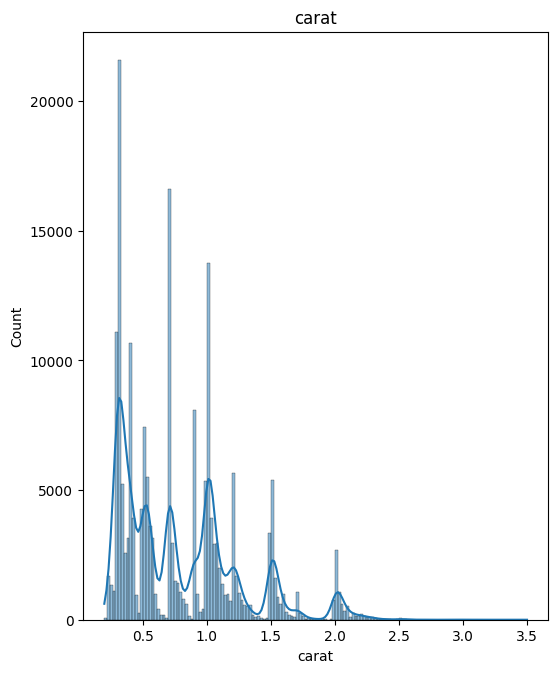

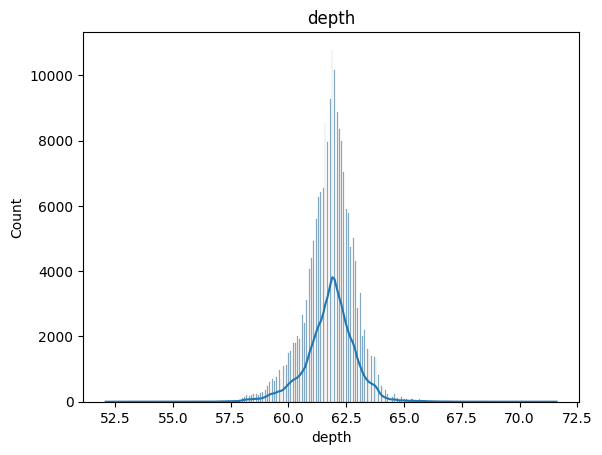

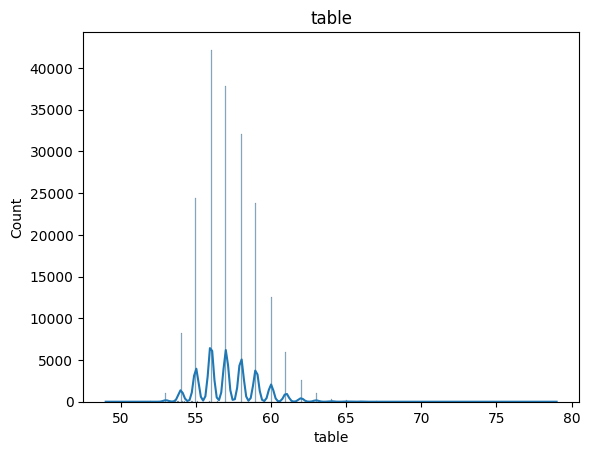

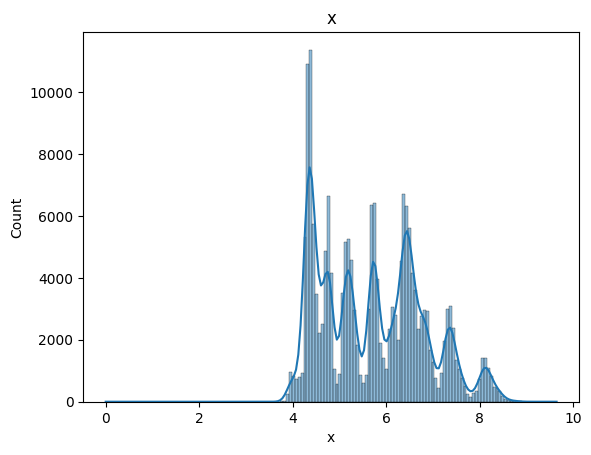

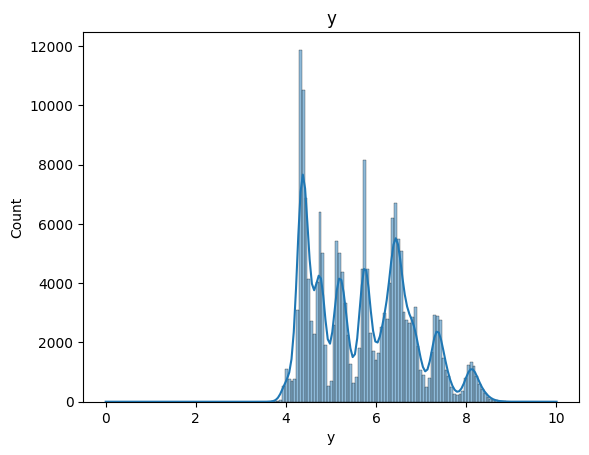

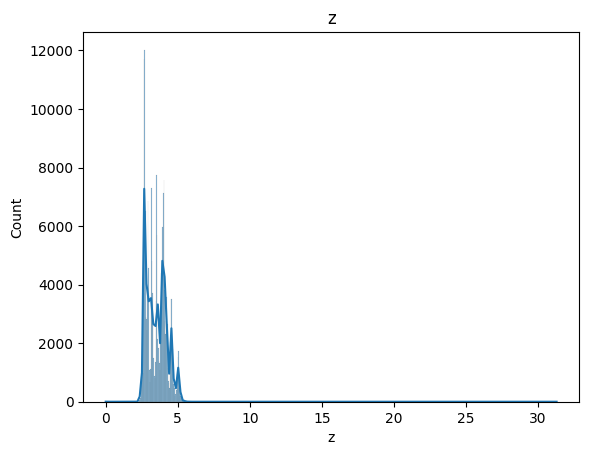

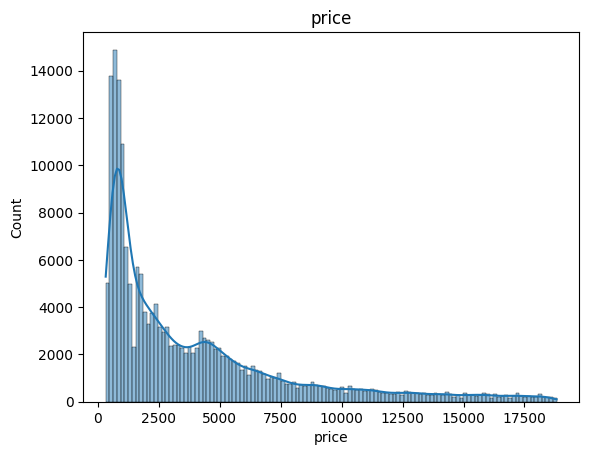

In [26]:
plt.figure(figsize=(6, 6))  
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)

for i in numerical_columns:
    sb.histplot(data=df, x=i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

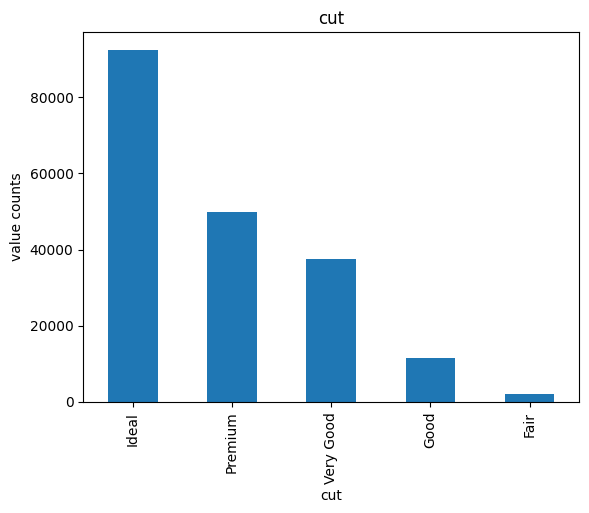

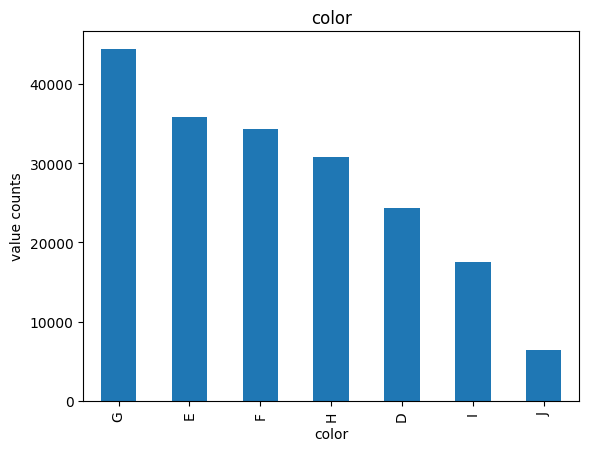

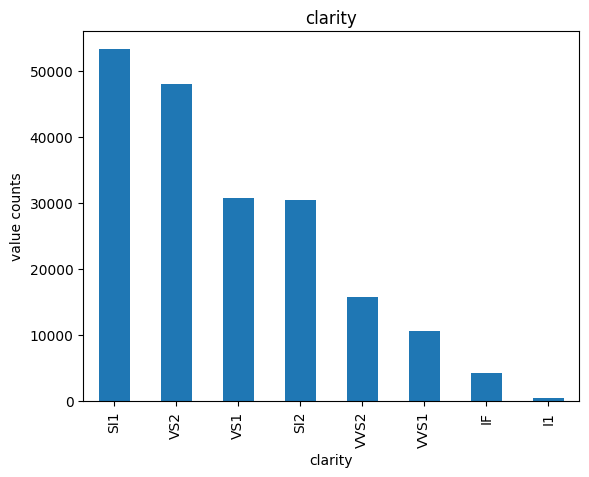

In [19]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

# Bivariate Analysis 


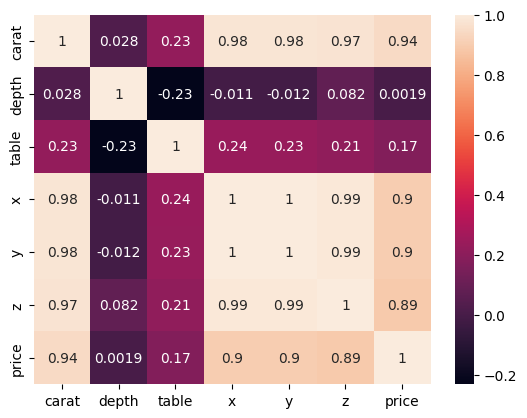

In [20]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

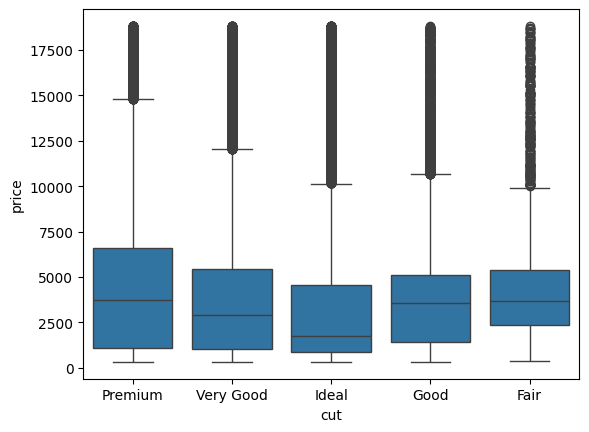

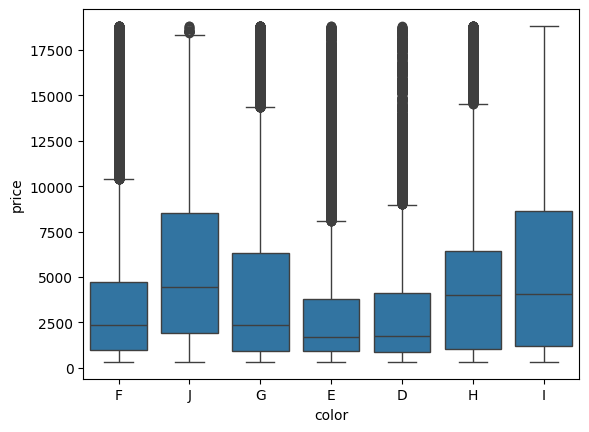

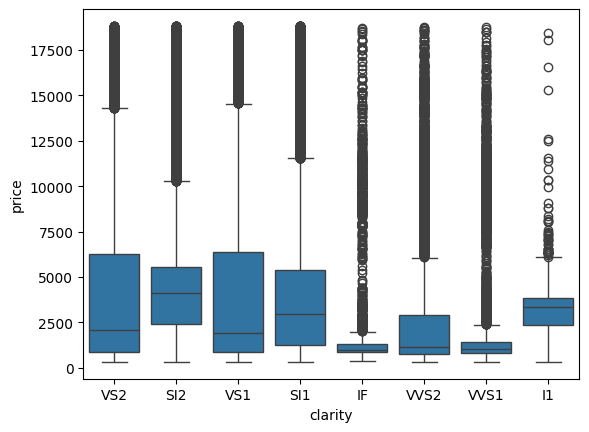

In [22]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()